In [1]:
import numpy as np
import matplotlib.pyplot as plt 

np.set_printoptions(suppress=True)

In [2]:
def kernel(X1, X2, l=1.0, sigma_f=1.0):
    '''
    Isotropic squared exponential kernel. Computes
    a covariance matrix from points in X1 and X2.
    Args:
    X1: Array of m points (m x d).
    X2: Array of n points (n x d).
    Returns:
    Covariance matrix (m x n).
    '''
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

In [3]:
def error_computer(functionvalue, predictedvalue):
    #print('shape of function value: ',functionvalue.shape)
    #print('shape of predicted value: ',predictedvalue.shape)
    error = np.dot((functionvalue - predictedvalue).T,(functionvalue - predictedvalue))/functionvalue.shape[0]
    return error 

In [4]:
def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[],title=None):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))

    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    
    print('sample length = ',len(samples))
    error_sample1 = error_computer(mu, samples[0,:])
    print('mean square error of sample 1 :',np.mean(error_sample1))
    
    
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
        plt.title(title)
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
        plt.title(title)
    plt.legend()
    plt.show()

In [5]:
def sample_generator(mu, covariance, n):
    samples = np.random.multivariate_normal(mu.ravel(), covariance, n)
    return samples 

In [6]:
# # Finite number of points
X = np.arange(-5, 5, 0.2).reshape(-1, 1)
# Mean and covariance of the prior
mu = np.zeros(X.shape)
cov = kernel(X, X)
# # Draw three samples from the prior
#samples = sample_generator(mu.ravel(), cov, 3)
#print('samples: ',samples)
# Plot GP mean, confidence interval and samples
#plot_gp(mu, cov, X, samples=samples)

In [7]:
def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    '''
    Computes the suffifient statistics of the GP posterior predictive distribution
    from m training data X_train and Y_train and n new inputs X_s.
    Args:
    X_s: New input locations (n x d).
    X_train: Training locations (m x d).
    Y_train: Training targets (m x 1).
    l: Kernel length parameter.
    sigma_f: Kernel vertical variation parameter.
    sigma_y: Noise parameter.
    Returns:
    Posterior mean vector (n x d) and covariance matrix (n x n).
    '''
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = np.linalg.inv(K)
    # Equation (4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)
    # Equation (5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    return mu_s, cov_s

sample length =  3
mean square error of sample 1 : 0.4081634477096509


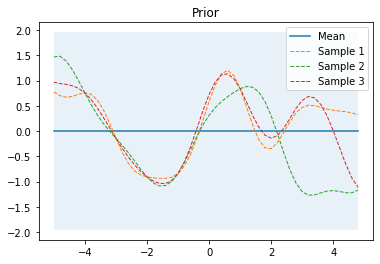

sample length =  3
mean square error of sample 1 : 0.14630877566685446


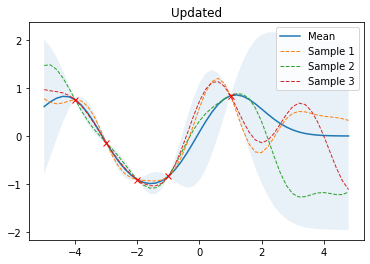

In [8]:
# Noise free training data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)
#plt.scatter(X_train, Y_train, label='Data')
# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train)
samples = sample_generator(mu_s.ravel(), cov_s, 3)
plot_gp(mu, cov, X, samples=samples,title='Prior')
#print('samples: ',samples)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples,title='Updated')

In [9]:
#print('X is: \n',X)
#print('X_train is: \n',X_train)
#print('Y_train is: \n',Y_train)
print('samples are: \n',samples)

samples are: 
 [[ 0.77741988  0.70249076  0.67106086  0.68767363  0.72932255  0.75670731
   0.72908657  0.6184239   0.4195414   0.15324079 -0.14116125 -0.41756017
  -0.63876382 -0.78812466 -0.87147271 -0.90919549 -0.92593593 -0.93622776
  -0.93812129 -0.9148461  -0.84140689 -0.6955054  -0.46402429 -0.15301836
   0.2123975   0.58813743  0.91572008  1.1360725   1.20294649  1.09786329
   0.84134041  0.49073718  0.12630972 -0.16903803 -0.33399279 -0.34693661
  -0.22832583 -0.02989413  0.18411275  0.36089529  0.47065397  0.51198292
   0.50331131  0.47113306  0.43748879  0.4131044   0.39813967  0.3839627
   0.36139852  0.32519905]
 [ 1.47185195  1.48395737  1.38901613  1.21508669  0.9942891   0.75681536
   0.52707642  0.32150092  0.14574129 -0.00440894 -0.14126543 -0.27926676
  -0.42917244 -0.59200495 -0.7576126  -0.90944312 -1.02587953 -1.08758479
  -1.08035353 -0.99750631 -0.84167703 -0.62617956 -0.37502688 -0.11806449
   0.11744416  0.31371252  0.46672428  0.58520381  0.68298709  0.769300